<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the bloood varied with sport body size and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
while blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [24]:
# Different measurements are used (ie nanograms, kilograms), will need to normalize

In [16]:
# Import libraries
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [17]:
plt.version

AttributeError: module 'matplotlib.pyplot' has no attribute 'version'

### 1. Import the data

In [2]:
csv_file = 'ais.csv'
data = pd.read_csv('../../Data/ais.csv')
data.head()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


### 2. Do some EDA of relationships between features.

In [3]:
data.shape

(202, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
Unnamed: 0    202 non-null int64
rcc           202 non-null float64
wcc           202 non-null float64
hc            202 non-null float64
hg            202 non-null float64
ferr          202 non-null int64
bmi           202 non-null float64
ssf           202 non-null float64
pcBfat        202 non-null float64
lbm           202 non-null float64
ht            202 non-null float64
wt            202 non-null float64
sex           202 non-null object
sport         202 non-null object
dtypes: float64(10), int64(2), object(2)
memory usage: 22.2+ KB


In [5]:
data.isnull().sum()

Unnamed: 0    0
rcc           0
wcc           0
hc            0
hg            0
ferr          0
bmi           0
ssf           0
pcBfat        0
lbm           0
ht            0
wt            0
sex           0
sport         0
dtype: int64

In [6]:
data.corr()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
Unnamed: 0,1.000000,0.658358,0.153908,0.660805,0.689778,0.441281,0.266935,-0.543638,-0.674826,0.579148,0.317385,0.370171
rcc,0.658358,1.000000,0.147064,0.924964,0.888800,0.250865,0.299471,-0.403004,-0.493512,0.550975,0.358854,0.403763
wcc,0.153908,0.147064,1.000000,0.153333,0.134720,0.132073,0.176968,0.136999,0.107960,0.102663,0.076811,0.155662
hc,0.660805,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,-0.532449,0.583375,0.371192,0.423711
hg,0.689778,0.888800,0.134720,0.950757,1.000000,0.308391,0.382524,-0.435429,-0.531522,0.610986,0.352322,0.455263
ferr,0.441281,0.250865,0.132073,0.258240,0.308391,1.000000,0.302556,-0.108243,-0.183386,0.317581,0.123255,0.273702
bmi,0.266935,0.299471,0.176968,0.320527,0.382524,0.302556,1.000000,0.321116,0.187558,0.713858,0.337097,0.845934
ssf,-0.543638,-0.403004,0.136999,-0.449135,-0.435429,-0.108243,0.321116,1.000000,0.963017,-0.207749,-0.071253,0.154196
pcBfat,-0.674826,-0.493512,0.107960,-0.532449,-0.531522,-0.183386,0.187558,0.963017,1.000000,-0.361850,-0.188022,-0.000193
lbm,0.579148,0.550975,0.102663,0.583375,0.610986,0.317581,0.713858,-0.207749,-0.361850,1.000000,0.802119,0.930913


In [19]:
conda install -c conda-forge matplotlib=3.1.2

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
Examining conflict for sphinxcontrib-devhelp numpydoc sphinx spyder anaconda:  77%|▊| 235/304 [45:37<08:35,  7.47s/it]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

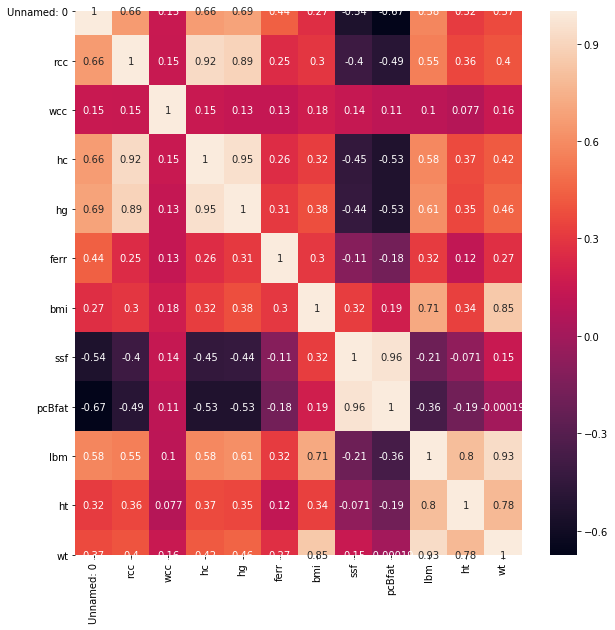

In [18]:
# Get heatmap of correlation
num_cols = data.select_dtypes(include="number").columns.tolist()
plt.figure(figsize=(10,10))
sns.heatmap(data[num_cols].corr(), annot = True)
plt.show()

In [10]:
sns.__version__

'0.9.0'

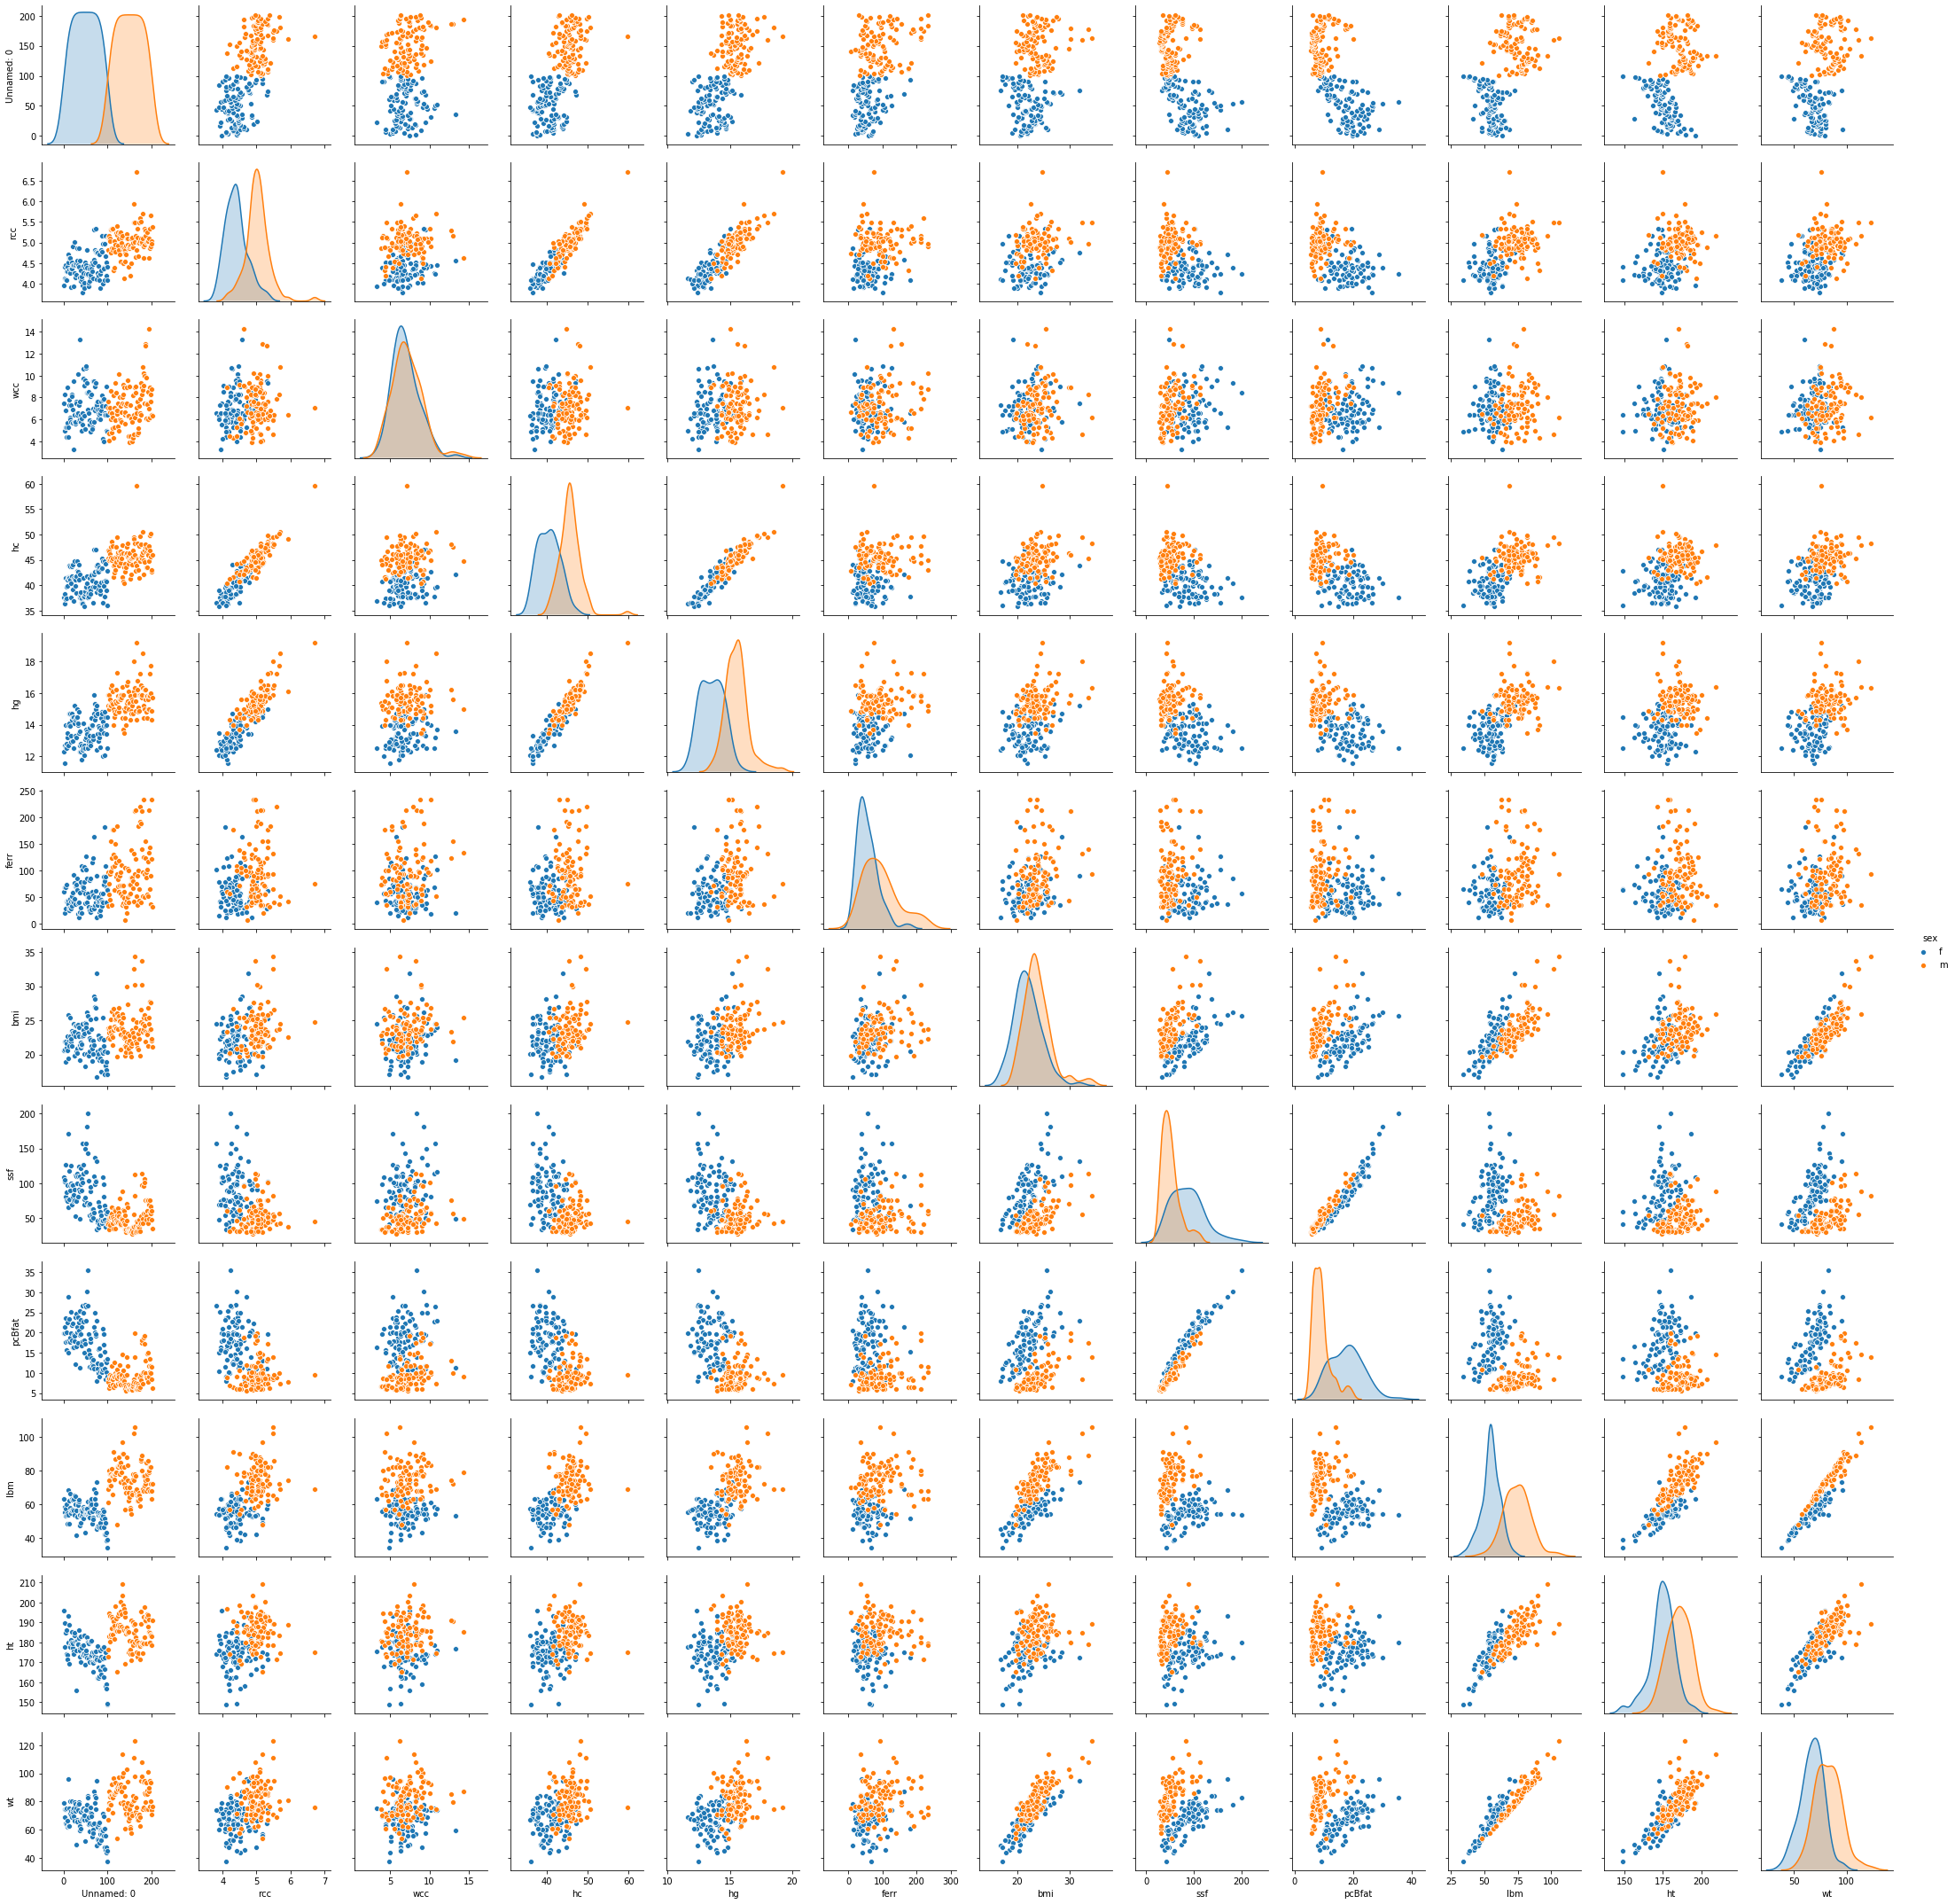

In [28]:
sns.pairplot(data, hue='sex')

In [9]:
data['sex'].value_counts()

m    102
f    100
Name: sex, dtype: int64

In [10]:
data['sport'].value_counts()

Row        37
T_400m     29
B_Ball     25
Netball    23
Swim       22
Field      19
W_Polo     17
T_Sprnt    15
Tennis     11
Gym         4
Name: sport, dtype: int64

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [11]:
# ANSWER
data2 = data.drop(['sex', 'sport'], axis = 1)
data2.head()
data2.shape

(202, 12)

In [12]:
data3 = data[['lbm', 'pcBfat']]
data3.describe()

,lbm,pcBfat
count,202.000000,202.000000
mean,64.873713,13.507426
std,13.070197,6.189826
min,34.360000,5.630000
25%,54.667500,8.545000
50%,63.035000,11.650000
75%,74.750000,18.080000
max,106.000000,35.520000


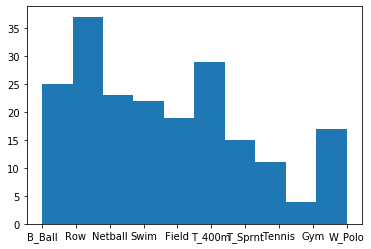

In [13]:
plt.hist(data['sport'])
plt.show()

In [29]:
# Need to normalize the data
data2.head()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6


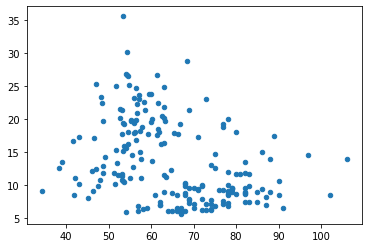

In [14]:
plt.scatter(data3['lbm'], data3['pcBfat'], s= 20)

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Lets try using 2, 4. Run the clustering algorithm with each of those k values.

In [15]:
# ANSWER
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data3)
y_means = kmeans.predict(data3)

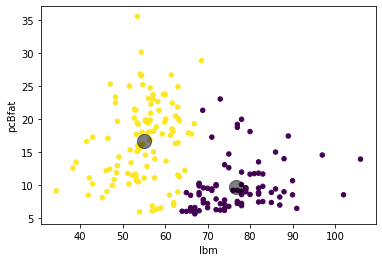

In [16]:
plt.scatter(data3['lbm'], data3['pcBfat'], c=y_means, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
plt.xlabel('lbm')
plt.ylabel('pcBfat')
plt.show()

### 5. Get the labels for the models

In [17]:
# ANSWER
print(centers)
print(data3)
print(y_means)

[[76.63956522  9.73097826]
 [55.03318182 16.66590909]]
       lbm  pcBfat
0    63.32   19.75
1    58.55   21.30
2    55.36   19.88
3    57.18   23.66
4    53.20   17.64
..     ...     ...
197  82.00   11.79
198  72.00   10.05
199  68.00    8.51
200  63.00   11.50
201  72.00    6.26

[202 rows x 2 columns]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [18]:
data3['y_means'] = y_means
print(data3)

       lbm  pcBfat  y_means
0    63.32   19.75        1
1    58.55   21.30        1
2    55.36   19.88        1
3    57.18   23.66        1
4    53.20   17.64        1
..     ...     ...      ...
197  82.00   11.79        0
198  72.00   10.05        0
199  68.00    8.51        0
200  63.00   11.50        1
201  72.00    6.26        0

[202 rows x 3 columns]


/Users/allenj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero. 

In [19]:
# ANSWER
# Building the clustering model and calculating the values of the distortion and inertia

X = np.array(list(zip(data3['lbm'], data3['pcBfat']))).reshape(len(data3['lbm']), 2)

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1,10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
    
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'),axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

    
for key,val in mapping1.items():
    print(str(key)+' : ' +str(val))

1 : 12.950760991537987
2 : 7.746887590737127
3 : 6.35549555578126
4 : 5.2869502350084
5 : 4.864857093917919
6 : 4.452648344279325
7 : 4.036674913180589
8 : 3.8642068046327487
9 : 3.626088113964362


Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

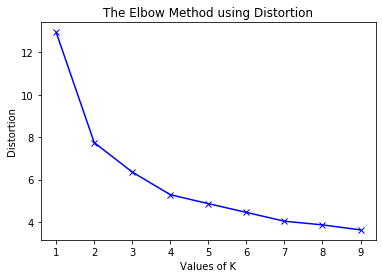

In [20]:
# ANSWER
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

1 : 42037.94417673268
2 : 16240.507640019763
3 : 11333.04587939056
4 : 7926.617901241935
5 : 6462.856434697147
6 : 5371.923934989321
7 : 4324.432476866047
8 : 3790.4606494824015
9 : 3290.0574081733685


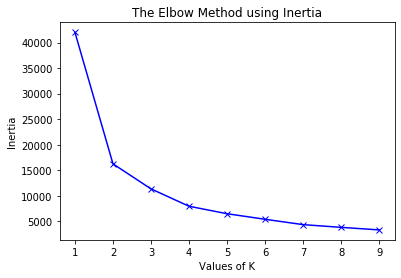

In [21]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

### 7. Plot `ht` vs. `wt` using the clusters from each model.

- Plot ht, wt using hue sex
- Plot ht, wt using hue label

Each time, compare to the actual species classification.

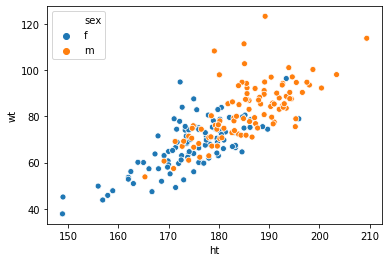

In [22]:
# ANSWER

sns.scatterplot(x=data['ht'], y=data['wt'], hue=data['sex'])

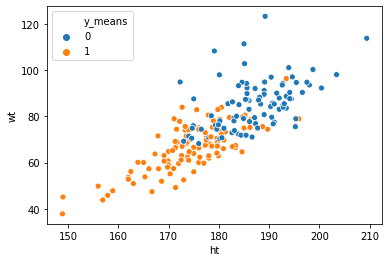

In [23]:
sns.scatterplot(x=data['ht'], y=data['wt'], hue=data3['y_means'])



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



